In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Broadcasting
**In Numpy, for loops can almost always be avoided using** *broadcasting*. Let's first see an example:

The simplest example of a broadcast is multiplying a constant number by anything:

![broadcasting](https://numpy.org/doc/stable/_images/np_multiply_broadcasting.png)

## Numpy examples


The below array provides the marks that a student has earned in 4 tests for a total of 17 marks in each test. Create another array that shows the percentage of the marks obtained by this student in each test.

In [ ]:
marks = np.array([12, 14.5, 16, 16.5])
marks_in_percent = (marks / 17) * 100
marks_in_percent

array([70.58823529, 85.29411765, 94.11764706, 97.05882353])

In [ ]:
#TestCase
np.testing.assert_allclose(marks_in_percent, [70.58823529, 85.29411765, 94.11764706, 97.05882353])

A developer is trying to add two lists using Matrix addition. However the expressions that are written below is not solving this problem correctly. Fix it without using any loop


In [ ]:
a = [4, 5, 6]
b = [3, 4, 5]
c = a + b
print(c)

[4, 5, 6, 3, 4, 5]


In [ ]:
a = np.array([4, 5, 6])
b = [3, 4, 5]
c = a + b
print(c)

[ 7  9 11]


A more complicated example may involve multidimensional arrays

![broadcasting](https://numpy.org/doc/stable/_images/broadcasting_2.png)

When operating on two arrays, NumPy compares their shapes element-wise. Two dimensions are compatible for broadcasting when

* They are equal, or
* one of them is 1

Some further examples of broadcasting rules applied:
    


https://numpy.org/doc/stable/user/basics.broadcasting.html#general-broadcasting-rules


In [ ]:
a = np.arange(12)
print(a.shape)
b = np.array([100, 200, 300])
a.shape = (4,3)
a + b

(12,)


array([[100, 201, 302],
       [103, 204, 305],
       [106, 207, 308],
       [109, 210, 311]])

## A data matrix
We will use titanic data to demonstrate some numpy functions

In [ ]:
import pandas as pd
import seaborn as sns
df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.head(3)

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True

In [ ]:
 df2 = df[['survived', 'pclass', 'age', 'fare']]
 type(df2)

pandas.core.frame.DataFrame

In [ ]:
columns = ['survived', 'pclass', 'age', 'fare']
df_array = df[columns].to_numpy()
type(df_array)

numpy.ndarray

In [ ]:
print(df_array.shape)

(891, 4)


## Numpy indexing conventions
$$\Huge (\underbrace{891}_{\text{outer}}, \underbrace{4}_\text{inner}) $$

## Accessing a particular row
Since Numpy indexes by outer-most dimension first, to access a *row* we can type:

In [ ]:
df_array[1]

array([ 1.    ,  1.    , 38.    , 71.2833])

In [ ]:
df.head(2)

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False

## Accessing a particular column
Since the column is the *inner* dimension, we have to access it using a different notation:

In [ ]:
age = df_array[:, 2]  # age column index
age

array([22.  , 38.  , 26.  , 35.  , 35.  ,   nan, 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,   nan,
       31.  ,   nan, 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,   nan,
       19.  ,   nan,   nan, 40.  ,   nan,   nan, 66.  , 28.  , 42.  ,
         nan, 21.  , 18.  , 14.  , 40.  , 27.  ,   nan,  3.  , 19.  ,
         nan,   nan,   nan,   nan, 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,   nan, 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,   nan,   nan, 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,   nan,   nan,  0.83, 30.  , 22.  ,
       29.  ,   nan, 28.  , 17.  , 33.  , 16.  ,   nan, 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,   nan, 71.  , 23.  , 34.  ,
       34.  , 28.  ,   nan, 21.  , 33.  , 37.  , 28.  , 21.  ,   nan,
       38.  ,   nan, 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,   nan, 32.5 , 32.5 , 54.  , 12.  ,
         nan, 24.  ,

## Summarizing a column

Find the mean age of titanic passengers

In [ ]:
age.mean()

nan

## Handling nans
Numpy has built-in function 'nanmean' that will ignore nans when computing  means, etc.

In [ ]:
np.nanmean(age)

29.69911764705882

## Filtering non-missing data
The other option we have is drop all the observations that have missing data before taking the mean. For this we will use 'np' function `isnan`:

In [ ]:
~np.isnan(age)

We can use boolean indexing in order to filter the original vector:

In [ ]:
notnan = ~np.isnan(age)
# notnan.shape
age[notnan].mean()

29.69911764705882

However using 'nanmean' instead is a better way of doing this!

## Restricting to only rows that have non-missing data
Sometimes we want to only keep rows that are non-missing on *every* variable. (In R this is the `complete.cases()` function.)

In [ ]:
np.isnan(age)

This gave us a matrix of `True` and `False` values. We want reduce this to a *vector* with one entry per row, which contains `True` if the row had any `NaN` values:

In [ ]:
any_nans = np.any(np.isnan(df_array), axis=1)
len(any_nans)

891

In [ ]:
any_nans

array([False, False,  True, False])

In [ ]:
df_array[~any_nans].shape

(714, 4)

## Filtering specific rows by number
Suppose I'm only interested in:

The last 5 observations:

In [ ]:
df_array[-5:]

array([[ 0.  ,  2.  , 27.  , 13.  ],
       [ 1.  ,  1.  , 19.  , 30.  ],
       [ 0.  ,  3.  ,   nan, 23.45],
       [ 1.  ,  1.  , 26.  , 30.  ],
       [ 0.  ,  3.  , 32.  ,  7.75]])

Observations 1, 2, and 16:

In [ ]:
df_array[[1, 2, 4]]

array([[ 1.    ,  1.    , 38.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  7.925 ],
       [ 0.    ,  3.    , 35.    ,  8.05  ]])

In [ ]:
df_array[:10]

array([[ 0.    ,  3.    , 22.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  8.4583],
       [ 0.    ,  1.    , 54.    , 51.8625],
       [ 0.    ,  3.    ,  2.    , 21.075 ],
       [ 1.    ,  3.    , 27.    , 11.1333],
       [ 1.    ,  2.    , 14.    , 30.0708]])

In [ ]:
df.head(10)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
5    man        True  NaN   Queenstown    no   True  
6    man        True    E  Southampton    no   True  
7  child       False  NaN  Southampton    no  False  
8  woman       False  NaN  Southampton   yes  False  
9  child       False  NaN    Cherbourg   yes  False

## Tuples vs. lists
It might surprise you to learn that Numpy treats tuples and lists differently for the purpose of indexing:

In [ ]:
df_array[[0, 1, 2, 3]]

array([[ 0.    ,  3.    , 22.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    , 53.1   ]])

You retrieved the first four rows with the above expression

In Numpy, tuples are regarded as coordinates in the actual array. So if I want the (0, 1) entry, I could type:

In [ ]:
df_array[(0, 1)]

3.0

Note that this is not any different than typing

In [ ]:
df_array[0, 1]

3.0

Reviewing what we did in class!

In [ ]:
df_array[(1, 2), (2)]

array([38., 26.])

In [ ]:
df_array[(1, 2),(2, 3)]

array([38.   ,  7.925])

In [ ]:
df_array[:10]

array([[ 0.    ,  3.    , 22.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  8.4583],
       [ 0.    ,  1.    , 54.    , 51.8625],
       [ 0.    ,  3.    ,  2.    , 21.075 ],
       [ 1.    ,  3.    , 27.    , 11.1333],
       [ 1.    ,  2.    , 14.    , 30.0708]])

## Filtering columns
Suppose I'm only interested in survived, age and fare (columns 0, 1, and 3):

In [ ]:
columns

['survived', 'pclass', 'age', 'fare']

I can filter on columns using a similar syntax to how I filtered on rows. But, because columns are organized along the second axis, I need to put those filtering conditions in the matching "slot" when doing indexing. To "get past" the first axis and onto the second, I must use the special placeholder `:`:

In [ ]:
df_array[:, 0]  # first column

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0.

In [ ]:
df_array[:, [0,-1]]  # first and last columns

array([[ 0.    ,  7.25  ],
       [ 1.    , 71.2833],
       [ 1.    ,  7.925 ],
       ...,
       [ 0.    , 23.45  ],
       [ 1.    , 30.    ],
       [ 0.    ,  7.75  ]])

## Normalizing the data
In many statistics/data sci applications, it is common to *normalize* the data in some way before analyzing. For example, when we run PCA, we need first center the data (subtract off the column mean). To do this we can use `np.mean` along with the `axis=` option:

In [ ]:
mu = np.nanmean(df_array, axis=0)
mu

array([ 0.38383838,  2.30864198, 29.69911765, 32.20420797])

I need to subtract this value off of each corresponding column. Here's the naive way using a for loop:

```
m, n = data.shape
mu = np.nanmean(data, axis=0)
for i in range(n):
    data[:, i] -= mu[i] # technically this is also broadcasting
```

In [ ]:
mu = np.nanmean(df_array, axis=0)
mu

array([ 0.38383838,  2.30864198, 29.69911765, 32.20420797])

In [ ]:
mu = np.nanmean(df_array, axis=0)
print(len(mu), type(mu))
df_centered = df_array - mu
df_centered.shape

4 <class 'numpy.ndarray'>


(891, 4)

In [ ]:
np.nanmean(df_centered, axis=0)

array([ 0.00000000e+00, -4.78479957e-17,  3.82140631e-15, -1.27594655e-16])

In the above example, I subtracted `mu`, which has shape `(n,)`, from `df_array`, which has shape `(m,n)`. The reason this did not raise an error is due to Numpy's broadcasting rules.

## Reductions and `axis=`

When I specified `axis=0`, it instructed Numpy to find the mean by collapsing the rows - get the values equal to number of colums


```
(m, n) -> np.mean(..., axis=0) -> (n,)
(m, n) -> np.mean(..., axis=1) -> (m,)

```

With higher-dimensional arrays, I can pass multiple axes at the same time:

```
(m, n, p, q) -> np.mean(..., axis=(0, 1)) -> (p, q)
(m, n, p, q) -> np.mean(..., axis=(1, 3)) -> (m, p)

```

## More on eliminating `for` loops
In many situtations, broadcasting and reduction can be used to eliminate `for` loops, which are comparatively slower.

### Example (supposed technical interview question)
Suppose I give you a stock's price history:

In [ ]:
prices = np.array([20, 18, 21, 14, 17, 20, 15])

You are only allowed to make two trades (one buy and one sell). What's the most money you could make?

Answer?

In [ ]:
print(prices.max() )
print(prices.min())

21
14


This is incorrect because the "buy" price, 14, came after the sell price of 21. To get the correct solution,
we could use two loops:

In [ ]:
n = len(prices)
best = 0
for i in range(n):  # possible buy prices
    for j in range(i, n):  # possible sell prices
        gain = prices[j] - prices[i]
        if gain > best:
            best = gain
best

6

We can write this more efficiently and compactly in Numpy as follows:

In [ ]:
# print(prices)
np.max(prices - np.minimum.accumulate(prices))

6

In [ ]:
prices - np.minimum.accumulate(prices)

array([0, 0, 3, 0, 3, 6, 1])

In [ ]:
prices

array([20, 18, 21, 14, 17, 20, 15])

In [ ]:
# try using accumulate on a list
np.minimum.accumulate(prices)

array([20, 18, 18, 14, 14, 14, 14])

## Official reference is a treasure trove
https://numpy.org/doc/stable/reference/routines.math.html

Check out what 'diff', 'cumsum' and many other functions do

### Example: find the nearest point
I have two sets $X$ and $C$ containing, respective data - list of points (all in same space):

In [ ]:
n = 10
p = 2
k = 3

X = np.random.default_rng().random(20)
X.shape = (n, p)
C = np.random.default_rng().random(6)
C.shape = (k, p)
print(X)
print("\n")
print(C)

[[0.53673207 0.02313748]
 [0.13666749 0.73260214]
 [0.87359817 0.37560999]
 [0.42534247 0.88989874]
 [0.26685222 0.33875557]
 [0.67810309 0.98532695]
 [0.18047349 0.13919009]
 [0.35141058 0.14298116]
 [0.10033121 0.9765217 ]
 [0.20436323 0.25711694]]


[[0.78858844 0.41469906]
 [0.77509341 0.38363654]
 [0.49071219 0.7923828 ]]


In [ ]:
X.shape, C.shape

((10, 2), (3, 2))

#### L2-norm - Euclidean norm

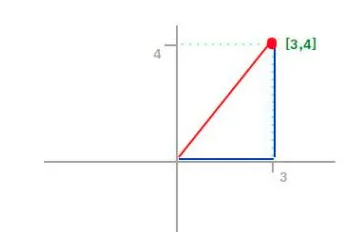

Use `np.linalg.norm` to find the distance between the two points

In [ ]:
a = np.array([3,4])
o = np.array([0,0])
np.linalg.norm(a-o)

5.0

## Find the nearest point (for loop version)

In [ ]:
results = []
point = []
for i in range(n):  # loop over every point
    x = X[i]
    # find closest point in C
    min_dist = float("inf")
    for j in range(k):
        c = C[j]
        dist = np.linalg.norm(x - c) # length
        if dist < min_dist:
            min_dist = dist
            j_star = j
    results.append(j_star)
    point.append(C[j_star])

results, point

([1, 2, 0, 2, 2, 2, 1, 1, 2, 1],
 [array([0.77509341, 0.38363654]),
  array([0.49071219, 0.7923828 ]),
  array([0.78858844, 0.41469906]),
  array([0.49071219, 0.7923828 ]),
  array([0.49071219, 0.7923828 ]),
  array([0.49071219, 0.7923828 ]),
  array([0.77509341, 0.38363654]),
  array([0.77509341, 0.38363654]),
  array([0.49071219, 0.7923828 ]),
  array([0.77509341, 0.38363654])])

## Find the nearest point (Numpy version)

In [ ]:
E = np.linalg.norm(X-C, axis=1)
print(E)

ValueError: ignored

In [ ]:
print(X.shape)
print(C.shape)
# we eventually want 10 x 3 sets of values; 10 points from X and its distances to the three points in C

(10, 2)
(3, 2)


In [ ]:
X.shape = (10, 1, 2)
C.shape = (1, 3, 2)

E = np.linalg.norm(X-C, axis=2)

In [ ]:
E

array([[0.46556643, 0.43217554, 0.77062066],
       [0.72530221, 0.72757449, 0.35905622],
       [0.09356606, 0.09883123, 0.56595163],
       [0.59813241, 0.61532686, 0.11739915],
       [0.52723439, 0.51021898, 0.50585665],
       [0.58122561, 0.60945752, 0.26896616],
       [0.6676144 , 0.64290506, 0.72312431],
       [0.51473789, 0.48725984, 0.66417425],
       [0.8884496 , 0.89822983, 0.43162998],
       [0.60510431, 0.58458545, 0.60704634]])

In [ ]:
E.shape

(10, 3)

Change the shape to help us get that

## Which is the closest point in C?

Use np.argmin

In [ ]:
np.argmin(E, axis=1)

array([1, 2, 0, 2, 2, 2, 1, 1, 2, 1])

In [ ]:
E.shape

(10, 2)

# A color photograph as data
Images are represented in the computer as 2-dimensional rectangular arrays.

Matplotlib reference:https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html


In [ ]:
import scipy.misc

face = scipy.misc.face(gray=False)
type(face)

<ipython-input-35-e67df0b33dac>:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = scipy.misc.face(gray=False)


numpy.ndarray

In [ ]:
face.shape

(768, 1024, 3)

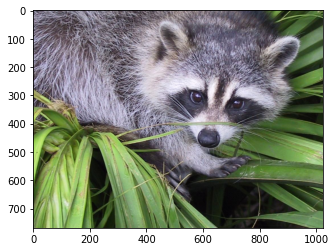

In [ ]:
plt.imshow(face)

The shape of this numpy array is:

In [ ]:
face.shape

(768, 1024, 3)

In [ ]:
face[0]

array([[121, 112, 131],
       [138, 129, 148],
       [153, 144, 165],
       ...,
       [119, 126,  74],
       [131, 136,  82],
       [139, 144,  90]], dtype=uint8)

This tells us that the image is 768 pixes high and 1024 pixels wide. What does the third axis signify?

## Review of singular value decomposition (SVD)

Quick review of something from linear algebra: if $X\in\mathbb{R}^{m\times n}$ is an $m$-by-$n$ matrix, then there exist $u_1,\dots,u_r \in \mathbb{R}^{m}$ and $v_1,\dots,v_r \in \mathbb{R}^n$, and $\sigma_1>\cdots>\sigma_r>0$, such that

$$X = \sum_{i=1}^r \sigma_i u_i v_i^T.$$

This is called the *singular value decomposition*. The number $r\le \min(m,n )$ is called the *rank* of $X$.


## Example of SVD in Numpy


In [ ]:
X = np.ones(9)
X.shape = (3,3)
u, s, vt = np.linalg.svd(X)
u @ np.diag(s) @ vt

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])